# ReadData

In [2]:
import pandas as pd

T2path = 'StataReg/0419-base/T2.csv'
T2 = pd.read_csv(T2path)
T3_Whole = T2[T2['Selected'] == 1]
T3path = 'StataReg/0419-base/Data.dta'
T3 = pd.read_stata(T3path)

# Republican Rate vs CvdVax 

Text(0.5, 1.0, 'Republican Rate and Black Flu Vax Rate')

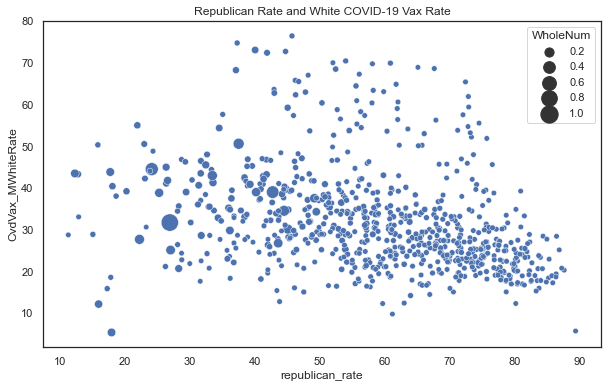

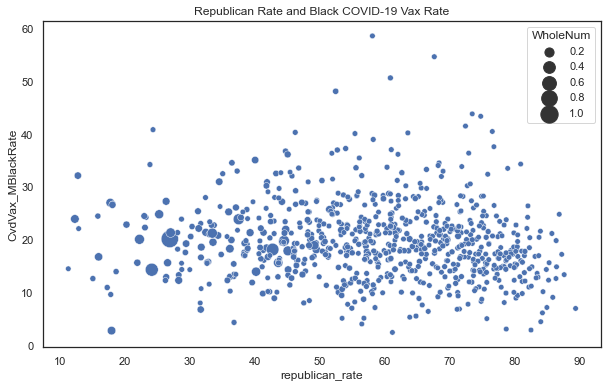

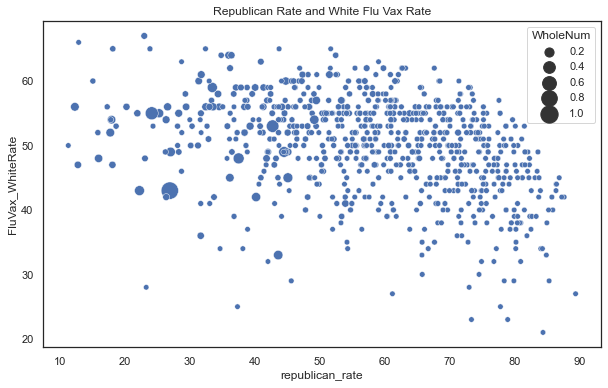

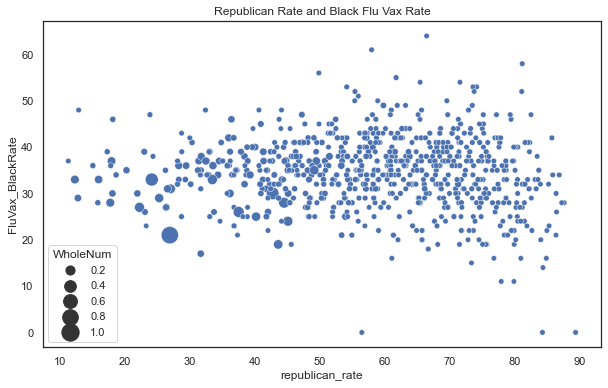

In [7]:


# ax = sns.relplot(x='republican_rate', y='Vax_White', data = T3_Whole, size='Total_Whole', sizes = (10, 400))


import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="white")

dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)

ax = sns.scatterplot(x='republican_rate', y='CvdVax_MWhiteRate', data = T3_Whole, size='WholeNum', sizes = (30, 300))
# ax = sns.regplot(x=OrgDF['republican_rate'], y=OrgDF['Vax_White'])

ax.set_title('Republican Rate and White COVID-19 Vax Rate')



fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(x='republican_rate', y='CvdVax_MBlackRate', data = T3_Whole, size='WholeNum', sizes = (30, 300))
# ax = sns.regplot(x=OrgDF['republican_rate'], y=OrgDF['Vax_Black'])
ax.set_title('Republican Rate and Black COVID-19 Vax Rate')



fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(x='republican_rate', y='FluVax_WhiteRate', data = T3_Whole, size='WholeNum', sizes = (30, 300))
# ax = sns.regplot(x=OrgDF['republican_rate'], y=OrgDF['FluVax_White'], )
ax.set_title('Republican Rate and White Flu Vax Rate')


fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(x='republican_rate', y='FluVax_BlackRate', data = T3_Whole, size='WholeNum', sizes = (30, 300))
# ax = sns.regplot(x=OrgDF['republican_rate'], y=OrgDF['FluVax_Black'])
ax.set_title('Republican Rate and Black Flu Vax Rate')
# ax = sns.regplot(x=OrgDF['Vax_Black'], y=OrgDF['republican_rate'], color="g")



# 这是啥

In [ ]:


OrgDF['VaxNumb_Total'] = OrgDF['VaxNumb_White'] + OrgDF['VaxNumb_Black']

OrgDF['FluVaxNumb_White'] = OrgDF['FluVax_White'] * OrgDF['Total_White']
OrgDF['FluVaxNumb_Black'] = OrgDF['FluVax_Black'] * OrgDF['Total_Black']
OrgDF['FluVaxNumb_Total'] = OrgDF['FluVaxNumb_White'] + OrgDF['FluVaxNumb_Black']


cols = ['Vax_White', 'Vax_Black', 'Vax_Disparity', 'VaxNumb_Total', 'FluVaxNumb_White', 'FluVaxNumb_Black', 'FluVaxNumb_Total', 'Total_Whole', 'Total_White', 'Total_Black']
newdf = OrgDF[cols]# .sum().to_dict()
newdf.describe()

In [ ]:
# df = newT3[['Vax_DisparityY', 'FluVax_DisparityY',
#        'MedianIncome', 'MedianIncome_Disparity', 'HighSchool_Rate',
#        'HighSchool_Disparity', 'logFacNum', 'logcases', 'IT_Rate',
#        'IT_Disparity', 'urban', 'vehicle', 'republican_rate', 'Segregation',
#        'racial_weighted_bias', 'hesitancy', 'Black_Prop',]]# .corr().to_csv('Correlation_Matrix.csv')

# df = newT3[['Vax_DisparityY', 'FluVax_DisparityY',
#        'MedianIncome', 'MedianIncome_Disparity', 'HighSchool_Rate',
#        'HighSchool_Disparity', 'FacNumRate', 'CaseRate', 'IT_Rate',
#        'IT_Disparity', 'urban', 'vehicle', 'republican_rate', 'Segregation',
#        'racial_weighted_bias', 'hesitancy', 'Black_Prop',]]

# OrgDF['Vax_Rate'] = OrgDF['VaxNumb_Total'] / OrgDF['Total_Whole']
# df = OrgDF[[ 'Vax_White', 'Vax_Black', 'Vax_Rate', 'Vax_Disparity', 'FluVax_White', 'FluVax_Black', 'FluVax_Rate', 'FluVax_Disparity', 'hesitancy',]]



df = T3[YXcols]

print(df.columns)



df.columns = ['CVD', 'FVD', 'MedianIncome',
       'MedianIncome_Disparity', 'HighSchool_Rate', 'HighSchool_Disparity',
       'FacNumRate', 'CaseRate', 'IT_Rate', 'IT_Disparity', 'urban', 'vehicle',
       'republican_rate', 'Segregation', 'racial_weighted_bias', 'hesitancy',
       'Black_Prop', 'FluVax_Rate', 'FluVax_Disparity', 'Above75_Rate',
       'Above75_Disparity']
# msno.matrix(df)


# from scipy.stats import pearsonr
# import numpy as np


# rho = df.corr()
# pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
# p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
# result = rho.round(2).astype(str) + p

# result.to_csv('Corr.csv')


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="white")


OrgDF['Vax_Rate'] = OrgDF['VaxNumb_Total'] / OrgDF['Total_Whole']
df = OrgDF[[ 'Vax_White', 'Vax_Black', 'Vax_Rate', 'Vax_Disparity', 'FluVax_White', 'FluVax_Black', 'FluVax_Rate', 'FluVax_Disparity', 'hesitancy',]]

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Covid-Vax-Rate-Distribution

In [18]:
# import pandas as pd
# RawData = T3_Whole 
# print(RawData.shape)

# counties_num = len(RawData)


In [19]:


# L = []

# for idx, row in RawData.iterrows():
#     d = row.to_dict()
#     dn = {}
#     dn['Vaccination'] = 'COVID-19'
#     dn['Race'] = 'Black'
#     dn['Rate (%)'] = d['CvdVax_MBlackRate'] # * 100
#     L.append(dn)
                    
                    
#     dn = {}
#     dn['Vaccination'] = 'COVID-19'
#     dn['Race'] = 'White'
#     dn['Rate (%)'] = d['CvdVax_MWhiteRate'] # * 100
#     L.append(dn)
                    
                    
#     dn = {}
#     dn['Vaccination'] = 'Flu'
#     dn['Race'] = 'Black'
#     dn['Rate (%)'] = d['FluVax_BlackRate'] # * 100
#     L.append(dn)
    
#     dn = {}
#     dn['Vaccination'] = 'Flu'
#     dn['Race'] = 'White'
#     dn['Rate (%)'] = d['FluVax_WhiteRate'] # * 100
#     L.append(dn)
    
# newdf = pd.DataFrame(L)


# # print(newdf.shape)

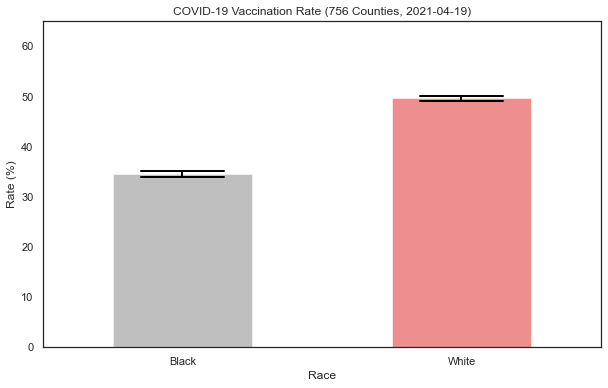

In [17]:
from matplotlib import pyplot as plt
import seaborn


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
# import mylib
covidnewdf = newdf[newdf['Vaccination'] == 'Flu']


time = '2021-04-19'
dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax.set(ylim=(0, 65))


if True:
    
    # df.to_csv('759_rate.csv')
    ax = sns.barplot(x="Race" , y="Rate (%)", palette = ['grey', 'red'], alpha = 0.5,
                     data=covidnewdf, errwidth = 2, errcolor = 'black', capsize=.3)
    
    change_width(ax, 0.5)
    
else:
    ax = sns.barplot(x="Vaccination" , y="Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=flunewdf, errwidth = 2, errcolor = 'black', capsize=.3)


ax.set_title('COVID-19 Vaccination Rate ({} Counties, {})'.format(counties_num, time))


plt.show()


In [ ]:
# print('April 19')
# Rate = RawData[[ 'FluVax_Disparity', 'FluVax_Black', 'FluVax_White',]].mean()*100
# Rate

In [ ]:

# newdf


from matplotlib import pyplot as plt
import seaborn

# import mylib
covidnewdf = newdf[newdf['Vaccination'] == 'COVID-19']
covidnewdf


dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)


ax.set(ylim=(0, 49))


# ax = sns.barplot(x="Race" , y="Rate (%)", palette = ['grey', 'red'], alpha = 0.5,
#                  data=covidnewdf, errwidth = 2, errcolor = 'black', capsize=.3)

ax = sns.barplot(x="Vaccination" , y="Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=flunewdf, errwidth = 2, errcolor = 'black', capsize=.3)



ax.set_title('COVID-19 Vaccination Rate (1199 Counties, April 19)')


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# change_width(ax, 0.95)
plt.show()



In [ ]:
ax = sns.barplot

In [ ]:

# newdf


from matplotlib import pyplot
import seaborn

# import mylib
flunewdf = newdf[newdf['Vaccination'] == 'Flu']
print(flunewdf.describe())


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)


ax.set(ylim=(0, 49))
# df.to_csv('759_rate.csv')
# ax = sns.barplot(x="Race" , y="Rate (%)", palette = ['grey', 'red'], alpha = 0.5,
#                  data=flunewdf,errwidth = 2, errcolor = 'black', capsize=.4)

ax = sns.barplot(x="Vaccination" , y="Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=flunewdf, errwidth = 2, errcolor = 'black', capsize=.3)



ax.set_title('Flu Vaccination Rate (1199 Counties, 2019)')
# ax.s

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# change_width(ax, .5)
plt.show()
1936/2

In [ ]:
print('March 27')
Rate = RawData[['Vax_Disparity', 'Vax_Black', 'Vax_White',  'FluVax_Disparity', 'FluVax_Black', 'FluVax_White',]].mean()*100
Rate

In [1]:
# 759

import pandas as pd
import numpy as np

# T2 = pd.read_csv('StataReg/CountyVaccineMarch27.csv')
# T2 = pd.read_csv('StataReg/CountyVaccineApril07.csv')
T2 = pd.read_csv('StataReg/CountyVaccineApril19.csv')
# first processing

T2
# RawData.loc[newT2.index][['Vax_White', 'Vax_Black', 'Vax_Disparity', 'FluVax_White', 'FluVax_Black', 'FluVax_Disparity',]].mean()


,State,County,AreaName,FIPS,Vax_White,Vax_Black,VaxNumb_White,VaxNumb_Black,Total_Whole,Total_White,...,HighSchool_Disparity,Bachelor_Disparity,IT_Disparity,CnoI_Disparity,noC_Disparity,Above75_Disparity,Unemployment_Disparity,MeanIncome_Disparity,MedianIncome_Disparity,FluVax_Disparity
0,California,Alameda,"Alameda, California",6001,0.272713,0.270879,224604.927990,49941.375150,1671329,823593,...,0.015,0.232,0.096,-0.053,-0.044,0.004083,-0.048,24218.0,56757.0,0.24
1,California,Amador,"Amador, California",6005,0.324251,0.075991,11554.998532,81.005884,39752,35636,...,0.263,0.182,0.344,0.057,-0.408,0.102773,0.070,32510.0,NaN,0.10
2,California,Butte,"Butte, California",6007,0.228574,0.141172,42912.995913,586.991907,219186,187742,...,-0.009,0.068,0.064,-0.087,0.021,0.042232,-0.123,13412.0,23524.0,0.13
3,California,Calaveras,"Calaveras, California",6009,0.241905,0.168666,10100.002995,83.995770,45905,41752,...,0.238,0.065,-0.138,0.061,0.065,0.037466,-0.396,15259.0,NaN,0.08
4,California,Colusa,"Colusa, California",6011,0.102547,0.117030,2013.000112,33.002424,21547,19630,...,-0.030,0.064,-0.012,-0.036,0.045,-0.006429,-0.036,11741.0,40316.0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Virginia,Williamsburg city,"Williamsburg city, Virginia",51830,0.225461,0.156002,2483.000000,373.000000,14954,11013,...,0.154,0.498,0.226,-0.192,-0.037,0.039609,-0.065,11783.0,9393.0,0.20
1289,Virginia,Winchester city,"Winchester city, Virginia",51840,0.124486,0.101134,2846.000000,321.000000,28078,22862,...,0.017,0.214,0.117,-0.028,-0.090,0.036097,0.013,6004.0,3525.0,0.16
1290,Virginia,Wise,"Wise, Virginia",51195,0.229298,0.079093,7925.000000,171.000000,37383,34562,...,0.132,0.117,-0.260,0.166,0.088,0.062452,0.051,7050.0,NaN,0.04
1291,Virginia,Wythe,"Wythe, Virginia",51197,0.155766,0.131301,4225.000000,112.000000,28684,27124,...,0.002,0.107,0.259,-0.123,-0.142,0.007275,-0.007,6620.0,NaN,0.20


# Bar Chart and Distribution Graph

## Covid Bar Chart

In [1]:
import pandas as pd

T2path = 'StataReg/0419-base/T2.csv'
T2 = pd.read_csv(T2path)
T3_Whole = T2[T2['Selected'] == 1].reset_index(drop = True)
T3path = 'StataReg/0419-base/Data.dta'
T3 = pd.read_stata(T3path)

print(T3_Whole.shape)

T3_Whole['Prop_Weights'] = T3_Whole['WholeNum'] / T3_Whole['WholeNum'].sum() * len(T3_Whole)
print(T3_Whole['Prop_Weights'].sum())

(756, 258)
756.0


In [7]:
import pandas as pd

RawData = T3_Whole
print(RawData.shape)

L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'Black'
    dn['VaxRate'] = d['CvdVax_MBlackRate'] # * d['Prop_Weights']
    dn['Prop_Weights'] = d['Prop_Weights']
    dn['Vaccination Rate (%)'] = d['CvdVax_MBlackRate'] * d['Prop_Weights']
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'White'
    dn['VaxRate'] = d['CvdVax_MWhiteRate'] # * d['Prop_Weights']
    dn['Prop_Weights'] = d['Prop_Weights']
    dn['Vaccination Rate (%)'] = d['CvdVax_MWhiteRate']* d['Prop_Weights']
    L.append(dn)
                    
    
newdf = pd.DataFrame(L)
# print(newdf.shape)
newdf

(756, 259)


,Vaccination,Race,VaxRate,Prop_Weights,Vaccination Rate (%)
0,COVID-19,Black,27.087876,7.404302,200.566807
1,COVID-19,White,43.856672,7.404302,324.728032
2,COVID-19,Black,14.117169,0.971035,13.708268
3,COVID-19,White,27.611875,0.971035,26.812103
4,COVID-19,Black,11.702987,0.095457,1.117135
...,...,...,...,...,...
1507,COVID-19,White,50.577493,2.421962,122.496749
1508,COVID-19,Black,14.808230,1.171971,17.354813
1509,COVID-19,White,40.996517,1.171971,48.046721
1510,COVID-19,Black,15.471167,0.200439,3.101032


In [22]:
import numpy as np
df = newdf[newdf['Race'] == 'Black']
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print(average,std)


black_w_average = average

import numpy as np
df = newdf[newdf['Race'] == 'White']
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print(average,std)

white_w_average = average

print(white_w_average - black_w_average)

32.83652202954368 6.482277659993485
51.6344817802774 6.5205127913536325
18.797959750733717


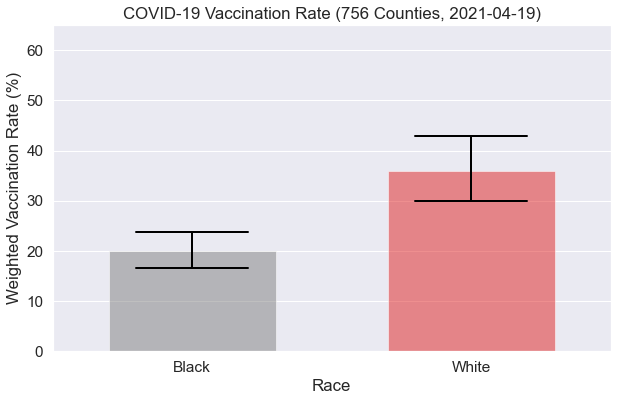

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns.set_theme(style="ticks")
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
dims = (10, 6)
fig, ax = plt.subplots(figsize=dims)
ax.set(ylim=(0, 65))



if True:
    
    
    ax = sns.barplot(x="Race" , y="Vaccination Rate (%)", #estimator=sum, 
                     palette = ['grey', 'red'], alpha = 0.5,
                     data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)
    
    
    # tips = sns.load_dataset("tips")
    # tips["weight"] = 10 * np.random.rand(len(tips))
    # tips["tip_and_weight"] = list(zip(tips.tip, tips.weight))

    # ax = sns.pointplot(x="Race", y="Race_Population", data=newdf, estimator=weighted_mean, 
    #                    palette = ['grey', 'red'], alpha = 0.5,errwidth = 2, errcolor = 'black', capsize=.4)


    change_width(ax, 0.6)
    
else:
    ax = sns.barplot(x="Vaccination" , y="Vaccination Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)



county_num = len(RawData)
date = '2021-04-19'



ax.set_ylabel("Weighted Vaccination Rate (%)")
ax.set_title('COVID-19 Vaccination Rate ({} Counties, {})'.format(county_num, date))


plt.show()




{'Black': 19.902528372509888,
 'White': 35.944926342136064,
 'Diff': 16.042397969626176}

In [7]:

print('April 19')
Rate = RawData[[ 'CvdVax_Disparity', 'CvdVax_MBlackRate', 'CvdVax_MWhiteRate',]].describe()
Rate.to_clipboard()
Rate

April 19


,CvdVax_Disparity,CvdVax_MBlackRate,CvdVax_MWhiteRate
count,756.000000,756.000000,756.000000
mean,12.118775,19.712736,31.831511
std,10.354706,7.268635,11.929706
min,-18.168016,2.480271,5.379974
25%,4.921826,14.952055,23.605326
50%,10.451356,19.077462,29.041354
75%,17.756555,23.417363,37.541453
max,53.842225,58.707865,76.501062


## Covid Distribution

(756, 259)


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 0.155)]

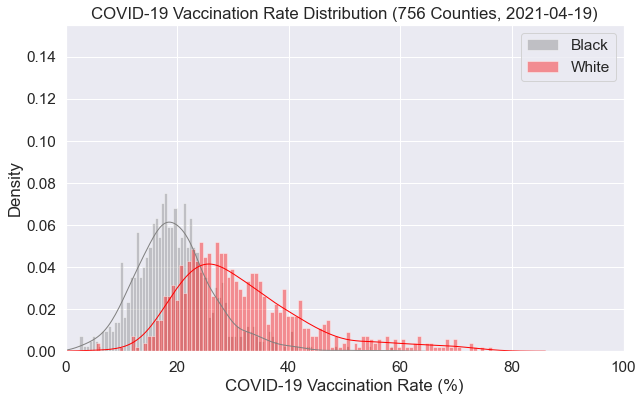

In [6]:
import pandas as pd
from matplotlib import pyplot#  as plt
 
    
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)


# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate

RawData = T3_Whole
print(RawData.shape)


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)

ax = sns.distplot(RawData['CvdVax_MBlackRate'], hist=True, kde=True, 
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')

ax = sns.distplot(RawData['CvdVax_MWhiteRate'], hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')

pyplot.legend(loc='best')

ax.set_title('COVID-19 Vaccination Rate Distribution ({} Counties, {})'.format(county_num, date))
ax.set(xlabel='COVID-19 Vaccination Rate (%)')
ax.set(ylabel ='Density')
ax.set(xlim=(0, 100))
ax.set(ylim=(0, 0.155))

## Flu Bar Chart

In [19]:
import pandas as pd

T2path = 'StataReg/0419-base/T2.csv'
T2 = pd.read_csv(T2path)
T3_Whole = T2[T2['Selected'] == 1].reset_index(drop = True)
T3path = 'StataReg/0419-base/Data.dta'
T3 = pd.read_stata(T3path)

print(T3_Whole.shape)

T3_Whole['Prop_Weights'] = T3_Whole['WholeNum'] / T3_Whole['WholeNum'].sum() * len(T3_Whole)
print(T3_Whole['Prop_Weights'].sum())

(756, 258)
756.0


In [20]:
import pandas as pd

RawData = T3_Whole
print(RawData.shape)

L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'Black'
    
    dn['VaxRate'] = d['FluVax_BlackRate'] # * d['Prop_Weights']
    dn['Prop_Weights'] = d['Prop_Weights']
    
    
    dn['Vaccination Rate (%)'] = d['FluVax_BlackRate']* d['Prop_Weights']
    # dn['Population'] = d['Total_Whole']
    # dn['Rate-Population'] = (dn['Vaccination Rate (%)'] , dn['Population'])
    L.append(dn)
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'White'
    
    dn['VaxRate'] = d['FluVax_WhiteRate'] # * d['Prop_Weights']
    dn['Prop_Weights'] = d['Prop_Weights']
    
    
    
    dn['Vaccination Rate (%)'] = d['FluVax_WhiteRate']* d['Prop_Weights']
    # dn['Population'] = d['Total_Whole']
    # dn['Rate-Population'] = (dn['Vaccination Rate (%)'] , dn['Population'])
    L.append(dn)
    
newdf = pd.DataFrame(L)
# print(newdf.shape)
newdf

(756, 259)


,Vaccination,Race,VaxRate,Prop_Weights,Vaccination Rate (%)
0,Flu,Black,28.0,7.404302,207.320449
1,Flu,White,52.0,7.404302,385.023691
2,Flu,Black,27.0,0.971035,26.217950
3,Flu,White,40.0,0.971035,38.841408
4,Flu,Black,33.0,0.095457,3.150090
...,...,...,...,...,...
1507,Flu,White,67.0,2.421962,162.271431
1508,Flu,Black,32.0,1.171971,37.503066
1509,Flu,White,56.0,1.171971,65.630365
1510,Flu,Black,42.0,0.200439,8.418456


In [23]:
import numpy as np
df = newdf[newdf['Race'] == 'Black']
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print(average,std)


black_w_average = average

import numpy as np
df = newdf[newdf['Race'] == 'White']
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print(average,std)

white_w_average = average

print(white_w_average - black_w_average)

32.83652202954368 6.482277659993485
51.6344817802774 6.5205127913536325
18.797959750733717


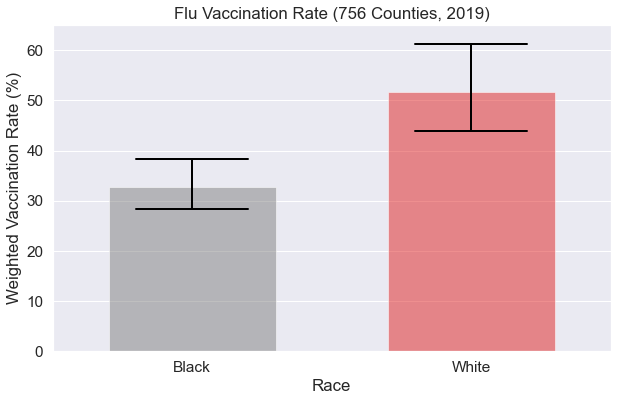

April 19


,FluVax_Disparity,FluVax_BlackRate,FluVax_WhiteRate
count,756.000000,756.000000,756.000000
mean,15.185185,34.486772,49.671958
std,6.444678,7.720178,7.516044
min,-12.000000,0.000000,21.000000
25%,12.000000,30.000000,45.000000
50%,16.000000,35.000000,50.000000
75%,19.000000,39.000000,55.000000
max,37.000000,64.000000,67.000000


In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns.set_theme(style="ticks")
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)



def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
# import mylib
newdf = newdf[newdf['Vaccination'] == 'Flu']


dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax.set(ylim=(0, 65))


if True:
    
    # df.to_csv('759_rate.csv')
    ax = sns.barplot(x="Race" , y="Vaccination Rate (%)", palette = ['grey', 'red'], # ci = 'sd',
                     alpha = 0.5, # estimator = sum,
                     data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)
    
    change_width(ax, 0.6)
    
else:
    ax = sns.barplot(x="Vaccination" , y="Vaccination Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)


# ax.set_ylabel("Weighted Vaccination Rate (%)")
# ax.set_title('Flu Vaccination Rate (759 Counties, 2019)')

county_num = len(RawData)
date = '2019'

ax.set_ylabel("Weighted Vaccination Rate (%)")
ax.set_title('Flu Vaccination Rate ({} Counties, {})'.format(county_num, date))

plt.show()

print('April 19')
Rate = RawData[[ 'FluVax_Disparity', 'FluVax_BlackRate', 'FluVax_WhiteRate',]].describe()
Rate.to_clipboard()
Rate

## Flu Distribution

(756, 280)


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 0.155)]

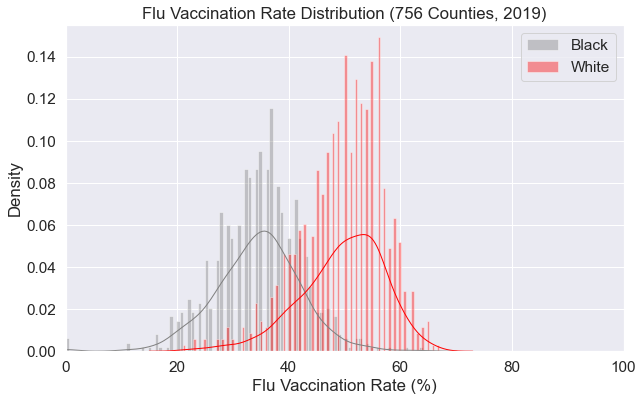

In [51]:
import pandas as pd
from matplotlib import pyplot#  as plt
 
    
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)

# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate

RawData = T3_Whole
print(RawData.shape)


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)

ax = sns.distplot(RawData['FluVax_BlackRate'], hist=True, kde=True, 
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')

ax = sns.distplot(RawData['FluVax_WhiteRate'], hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')

pyplot.legend(loc='best')

ax.set_title('Flu Vaccination Rate Distribution ({} Counties, {})'.format(counties_num, date))
ax.set(xlabel='Flu Vaccination Rate (%)')
ax.set(ylabel ='Density')
ax.set(xlim=(0, 100))
ax.set(ylim=(0, 0.155))